In [1]:
%matplotlib notebook

In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
from pathlib import Path
crime_data_to_load=Path("/Users/Nico/Documents/Resources/Starter_Code/crime-data-from-2010-to-present.csv")
crime_data_df = pd.read_csv(crime_data_to_load, parse_dates=["Date Reported","Date Occurred"])

In [3]:
#Total number of unique area names
area_name_count=len(crime_data_df["Area Name"].unique())
area_name_count

21

In [4]:
#Total number of Crime Code Description
crime_count=len(crime_data_df["Crime Code Description"].unique())
crime_count

140

In [5]:
#Find the most common geographical area name in LA County
most_common_area=crime_data_df["Area Name"].value_counts()
most_common_area

77th Street    137513
Southwest      128111
N Hollywood    107707
Pacific        105655
Southeast      105104
Mission         98395
Northeast       94912
Van Nuys        94358
Newton          94123
Hollywood       92742
Topanga         92262
Devonshire      91347
Central         90489
Olympic         89634
Harbor          86972
West Valley     84521
Rampart         84241
West LA         83736
Wilshire        82575
Foothill        75348
Hollenbeck      73514
Name: Area Name, dtype: int64

In [6]:
#What area name has the least committed amount of crimes?
least_common_area=crime_data_df["Area Name"].value_counts(ascending=True)
least_common_area

Hollenbeck      73514
Foothill        75348
Wilshire        82575
West LA         83736
Rampart         84241
West Valley     84521
Harbor          86972
Olympic         89634
Central         90489
Devonshire      91347
Topanga         92262
Hollywood       92742
Newton          94123
Van Nuys        94358
Northeast       94912
Mission         98395
Southeast      105104
Pacific        105655
N Hollywood    107707
Southwest      128111
77th Street    137513
Name: Area Name, dtype: int64

In [7]:
#Find the highest amount of homicides by Area Name
homicide_count=crime_data_df[crime_data_df['Crime Code']==110].groupby(['Area Name'])['DR Number'].count()
sorted_homicide=homicide_count.sort_values(ascending=False)
sorted_homicide

Area Name
77th Street    422
Southeast      363
Newton         229
Southwest      212
Hollenbeck     157
Harbor         156
Rampart        139
Mission        128
Foothill       111
Central         98
Northeast       86
Olympic         79
N Hollywood     76
Hollywood       66
Van Nuys        58
Wilshire        55
West Valley     52
Pacific         48
Devonshire      39
Topanga         36
West LA         24
Name: DR Number, dtype: int64

In [8]:
crime_max=crime_data_df.groupby("Area Name")["Crime Code"].max()

merge_max=pd.merge(crime_data_df, crime_max, how="right", on=["Area Name", "Crime Code"])

In [9]:
#Cleaning up the data
#crime_data=crime_data.dropna(how='any')
#crime_data.head()

In [10]:
#Diplay a data table of the mean, median, and SEM of crime offenders' age who committed homicide
mean=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).mean()
median=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).median()
sem=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).sem()


summary_stat=pd.DataFrame({"Mean of Victim Age":mean,
                          "Median of Victim Age":median,
                          "Victim Age Std. Err":sem})
#colors=['blue', 'red', 'yellow']
#df_colors=[mean, median, sem]
#for i, df_colors in enumerate(df_colors):
    #df_colors.plot(kind="bar", x="Area Name", y="Victim Age", colors=colors[i])
    #plot.show()

Text(0.5, 1.0, "Median of Victim's Age per Area Name")

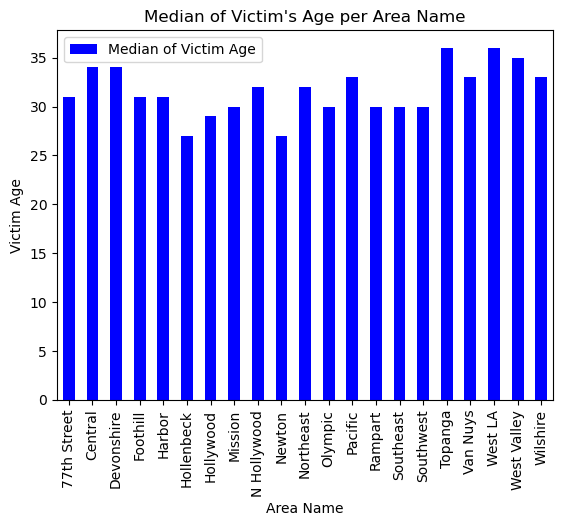

In [11]:
#Display bar graph of the Median of Victim Age
median=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).median()
median_stat=pd.DataFrame({"Median of Victim Age":median})

plot_pandas=median_stat.plot.bar(color='b')
plt.xlabel("Area Name")
plt.ylabel("Victim Age")
plt.title("Median of Victim's Age per Area Name")

Text(0.5, 1.0, "Mean of Victim's Age per Area Name")

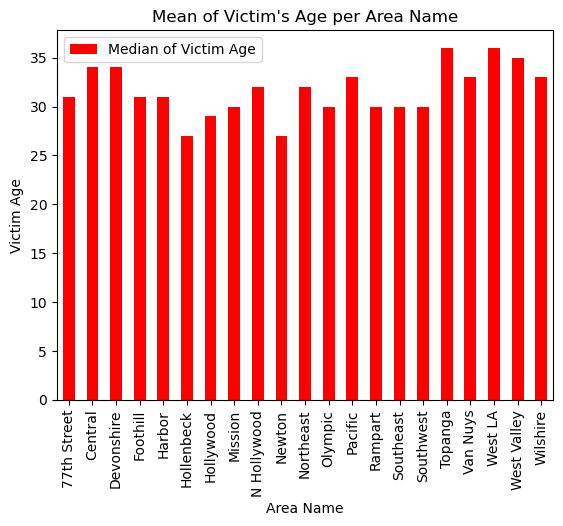

In [12]:
#Display bar graph of the Mean of Victim Age
mean=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).mean()
mean_stat=pd.DataFrame({"Median of Victim Age":median})

plot_pandas=mean_stat.plot.bar(color='r')
plt.xlabel("Area Name")
plt.ylabel("Victim Age")
plt.title("Mean of Victim's Age per Area Name")

In [35]:
#What ethnicities have the highest victim counts?
eth_count = crime_data_df["Victim Descent"].value_counts()
eth_count.head(10)

# Create the lists for a new dataframe
eth_info = {"Ethnicity":["Hispanic", "White", "Black", "Unknown", "Not reported"],
    "Victims Per Ethnicity": [685420, 483035, 316944, 191600, 68234]}
eth_df= pd.DataFrame(eth_info)


eth_df.head(6)


,Ethnicity,Victims Per Ethnicity
0,Hispanic,685420
1,White,483035
2,Black,316944
3,Unknown,191600
4,Not reported,68234


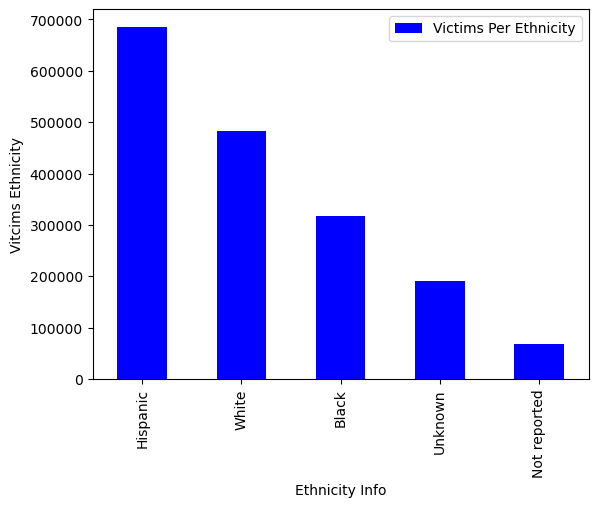

In [40]:
# Bar Chart visiual of victims per ethnicity
var = eth_df.plot (kind = "bar", x= "Ethnicity", y = "Victims Per Ethnicity", color=("b"))
plt.xlabel("Ethnicity Info")
plt.xticks(rotation = 90)
plt.ylabel("Vitcims Ethnicity")
var.set_xticklabels(eth_df["Ethnicity"])

plt.show()




In [17]:
#Create a DataFrame that contains the most frequent crime code for each ethnicity in Victim Descent

#Combine the Victim Descent and Crime Code columns
ethnicity_group = crime_data_df.groupby(["Victim Descent", "Crime Code"]).size().reset_index(name= "Victim_counts")

#Find the Max for each Victim Descent
max_counts = ethnicity_group.groupby("Victim Descent")["Victim_counts"].agg("max")

#Merge the combined data with the max count for Victim descent
crime_result = pd.merge(ethnicity_group, max_counts, on="Victim Descent", suffixes = ("", "_max"))

crime_result = crime_result[crime_result["Victim_counts"] == crime_result["Victim_counts_max"]]

crime_result = crime_result.drop(columns=["Victim_counts_max"])

# Filter the data frame so that we only see Victim counts over 10000
cleaned_crime_result = crime_result.query("Victim_counts >= 10000")

#Display the dta frame
cleaned_crime_result


,Victim Descent,Crime Code,Victim_counts
177,B,624,45217
487,H,624,81094
783,O,310,20913
1041,W,330,52427
1196,X,442,12271


In [18]:
cleaned_crime_result.sort_values(by="Victim_counts")

,Victim Descent,Crime Code,Victim_counts
1196,X,442,12271
783,O,310,20913
177,B,624,45217
1041,W,330,52427
487,H,624,81094


Note: create visualization to show top crime codes per victim descent. What were the top areas were the top areas for 624's

In [19]:
# Filter the data to see what the most frequent crime codes for Victim Descent B

victim_descent= ["B"]
victim_data = crime_data_df[crime_data_df["Victim Descent"].isin(victim_descent)]

#Group the data by the Crime code and victim count
crime_commit = victim_data.groupby(["Victim Descent","Crime Code"]).size().reset_index(name="Victim_count")
crime_victims = crime_commit.sort_values("Victim_count", ascending=False)


print(crime_victims.head(10))

   Victim Descent  Crime Code  Victim_count
58              B         624         45217
60              B         626         27766
6               B         230         26740
37              B         440         22538
15              B         330         19033
13              B         310         18627
26              B         354         18279
77              B         745         16766
76              B         740         14638
4               B         210         13857


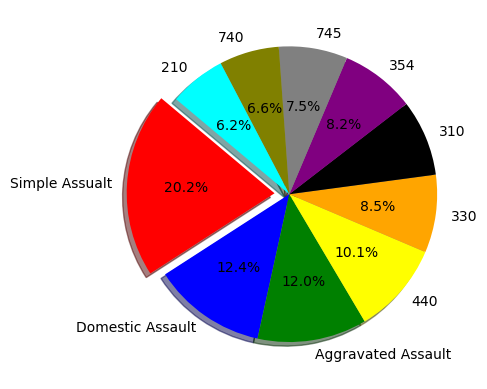

In [53]:
# Labels for the sections of the Pie chart
labels = ["Simple Assualt", "Domestic Assault", "Aggravated Assault", "440", "330", "310", "354", "745", "740", "210"]

# The values for the number of assualts
number_of_assaults = [45217, 27766, 26740, 22538, 19033, 18627, 18279, 16766, 14638, 13857]

# Set colors for each section of the pie chart
colors = ["red", "blue", "green", "yellow", "orange", "black", "purple", "grey", "olive", "cyan"]

#Seperate the "Simple Assualt" section from the others
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Create the pie chart and display it
plt.pie(number_of_assaults, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [21]:
# Filter the data to see what the most frequent crime codes for Victim Descent H
victim_descent= ["H"]
victim_data = crime_data_df[crime_data_df["Victim Descent"].isin(victim_descent)]

#Group the data by the Crime code and victim count
crime_commit = victim_data.groupby(["Victim Descent","Crime Code"]).size().reset_index(name="Victim_count")
crime_victims = crime_commit.sort_values("Victim_count", ascending=False)

print(crime_victims.head(10))

   Victim Descent  Crime Code  Victim_count
60              H         624         81094
62              H         626         55708
15              H         330         54337
6               H         230         42289
37              H         440         41949
4               H         210         40938
26              H         354         38663
78              H         740         37278
13              H         310         35662
79              H         745         32623


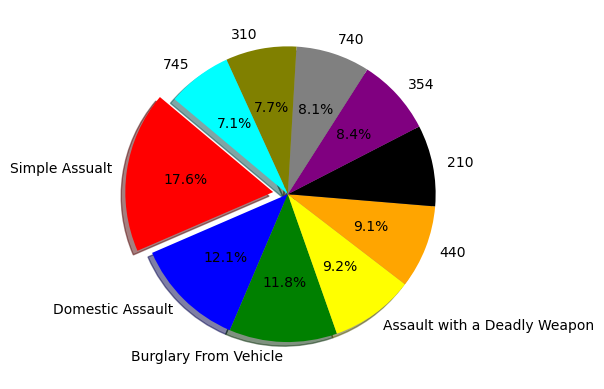

In [52]:
# Labels for the sections of the Pie chart
labels = ["Simple Assualt", "Domestic Assault", "Burglary From Vehicle","Assault with a Deadly Weapon", "440", "210", "354", "740", "310", "745"]

# The values for the number of assualts
number_of_assaults = [81094, 55708, 54337, 42289, 41949, 40938, 38663, 37278, 35662, 32623]

# Set colors for each section of the pie chart
colors = ["red", "blue", "green", "yellow", "orange", "black", "purple", "grey", "olive", "cyan"]

#Seperate the "Simple Assualt" section from the others
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Create the pie chart and display it
plt.pie(number_of_assaults, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()